In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import os


X = []
y = []


train_path = "drive/My Drive/train/tranthanh"
for img in os.listdir(train_path):
    img_array = cv2.imread(os.path.join(train_path,img),cv2.IMREAD_GRAYSCALE)   
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    X.append(new_img_array)
    y.append(0)
    
train_path = "drive/My Drive/train/hoailinh"
for img in os.listdir(train_path):
    img_array = cv2.imread(os.path.join(train_path,img),cv2.IMREAD_GRAYSCALE)   
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    X.append(new_img_array)
    y.append(1)
    
train_path = "drive/My Drive/train/other"
for img in os.listdir(train_path):
    img_array = cv2.imread(os.path.join(train_path,img),cv2.IMREAD_GRAYSCALE)   
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    X.append(new_img_array)
    y.append(2)
    
x_train, x_test,y_train,y_test = train_test_split(X, y,test_size=0.1, random_state=41)
x_train = np.array(x_train).reshape(-1,80,80,1)
x_test  = np.array(x_test).reshape(-1,80,80,1)
y_train = np.array(y_train)
y_test  = np.array(y_test)
x_train= x_train/255
x_test = x_test/255

In [3]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [31]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Train on 1408 samples, validate on 353 samples
Epoch 1/50
1408/1408 [==============================] - 26s 18ms/sample - loss: 0.8363 - acc: 0.7010 - val_loss: 0.7203 - val_acc: 0.6884
Epoch 2/50
1408/1408 [==============================] - 26s 18ms/sample - loss: 0.6035 - acc: 0.7592 - val_loss: 1.0121 - val_acc: 0.6941
Epoch 3/50
1408/1408 [==============================] - 25s 18ms/sample - loss: 0.5443 - acc: 0.7820 - val_loss: 0.5538 - val_acc: 0.8074
Epoch 4/50
1408/1408 [==============================] - 26s 18ms/sample - loss: 0.4170 - acc: 0.8516 - val_loss: 0.4561 - val_acc: 0.8102
Epoch 5/50
1408/1408 [==============================] - 25s 18ms/sample - loss: 0.3142 - acc: 0.8849 - val_loss: 0.4124 - val_acc: 0.8527
Epoch 6/50
1408/1408 [==============================] - 25s 18ms/sample - loss: 0.2184 - acc: 0.9205 - val_loss: 0.3820 - val_acc: 0.8640
Epoch 7/50
1408/1408 [==============================] - 25s 18ms/sample - loss: 0.2052 - acc: 0.9240 - val_loss: 0.4696 - val

In [6]:
predictions = model.evaluate(x_test,y_test)


196/196 [==============================] - 3s 14ms/sample - loss: 1.2418 - acc: 0.8878


In [38]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   107k      0 --:--:-- --:--:-- --:--:--  109k


In [0]:
def regconizeFace(image):
    predict = ""
    cascade = cv2.CascadeClassifier("drive/My Drive/haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(image)
    for x, y, w, h in faces:
        sub_face = image[y:y + h, x:x + w]
        sub_face = cv2.resize(sub_face, dsize=(80, 80))
        sub_face = np.array(sub_face).reshape(-1,80,80,1)
        sub_face = sub_face/255

        if(model.predict(sub_face)[0][0] > model.predict(sub_face)[0][1] and model.predict(sub_face)[0][0] > model.predict(sub_face)[0][2]):
            predict = "Tran Thanh"
        elif(model.predict(sub_face)[0][1] > model.predict(sub_face)[0][0] and model.predict(sub_face)[0][1] > model.predict(sub_face)[0][2]):
            predict = "Hoai Linh"
        else:
            predict = "Unknown"

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, predict, (x,y), font, 0.7, (0xffff), 2, cv2.LINE_AA)
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    



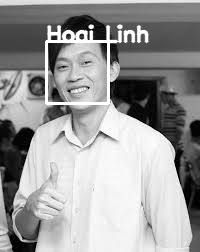

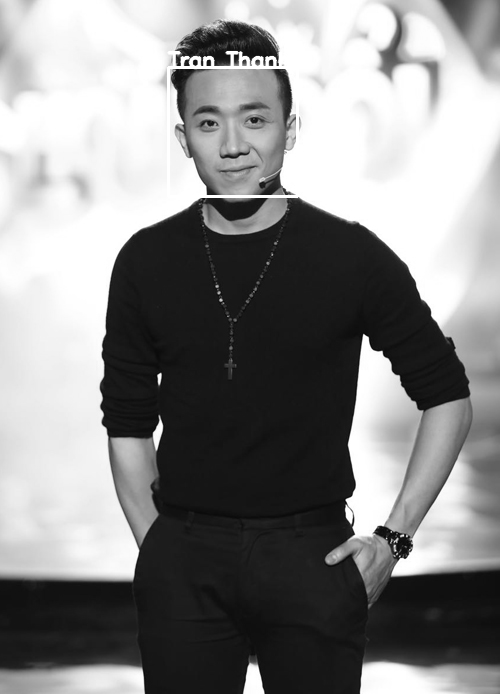

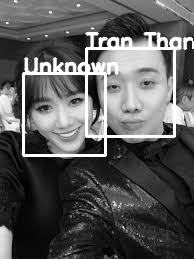

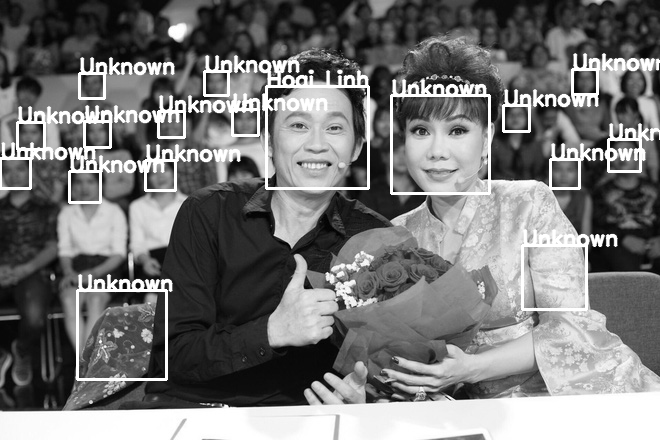

In [40]:
counter = 0
train_path = "drive/My Drive/train/test"
for img in os.listdir(train_path):
    img_array = cv2.imread(os.path.join(train_path,img),cv2.IMREAD_GRAYSCALE)   
    regconizeFace(img_array)
    cv2_imshow(img_array)